In [27]:
# Demonstration of Boostrap 
# Contact: Michael Pyrcz, University of Texas at Austin, Geostatistics Course
#
# Steps:
# 1. Build an initial sample set with $ndata$ samples.
# 2. Draw from this initial sample set, with replacement, $ndata$ times to build a new realization of the sample.  
#    Repeat this $nreal$ times to make realizations of the sample.
# 3. Calculate the statistic of interest for each realization. This demonstration considers with mean and variance.  
#    We could have considered any sstatistic including median, 13th percentile, skew etc. 
# 4. - 6. Quantify and visualize uncertainty with histograms and summary statistics.
#
# Efron, 1982, The jackknife, the bootstrap, and other resampling plans, Society of Industrial and Applied Math, 
# CBMS-NSF Monographs, 38.

In [28]:
# Imports 
import scipy
import numpy as np
import pandas as pd
import math
import random as rand
import matplotlib.pyplot as plt

In [29]:
# 1. Make Dataset with User Specified Number of Data (assume Gaussian N[0,1] for this example, but could be any distribution)
nreal = 100                                # number of bootstrap realizations
ndata = 10                                 # number of data samples available
data = np.zeros((ndata))                    
for idata in range(0, ndata):
    data[idata] = np.random.normal()
print('The initial sample set:')
data

The initial sample set:


array([ 0.78905746, -0.74536691, -0.3672344 , -1.7200198 , -1.45637476,
        0.596527  ,  1.26733395,  0.00919964,  1.65619443, -0.97839249])

In [30]:
# 2. Perform ndata random draws with replacement, nreal times.  Here we aquire the nreal realizations of the distribution of 
# ndata, samples.
draw = np.zeros((ndata,nreal)) 
for ireal in range(0, nreal):
    for isample in range(0, ndata):
        draw[isample,ireal] = rand.choice(data)
print('The realizations of the sample set:')
draw

The realizations of the sample set:


array([[ 1.26733395,  0.596527  ,  0.00919964,  0.00919964,  0.00919964,
        -0.74536691, -0.3672344 ,  0.78905746, -1.7200198 , -1.7200198 ,
        -0.97839249,  0.596527  , -0.97839249,  1.26733395,  0.596527  ,
         0.78905746,  1.65619443, -1.7200198 , -1.45637476, -1.7200198 ,
         0.00919964,  1.26733395, -0.74536691, -0.3672344 ,  0.00919964,
        -0.74536691,  0.596527  ,  1.65619443, -1.7200198 ,  0.596527  ,
        -0.3672344 ,  0.78905746,  0.00919964,  1.26733395, -1.45637476,
         0.00919964,  0.00919964,  0.596527  ,  0.00919964, -0.74536691,
        -1.45637476,  1.26733395,  0.596527  , -1.45637476,  0.596527  ,
         0.596527  ,  1.26733395,  1.26733395,  1.65619443, -0.74536691,
         1.65619443,  0.596527  , -1.7200198 , -1.45637476, -0.97839249,
        -0.3672344 , -0.97839249, -0.74536691, -1.7200198 , -0.3672344 ,
         0.596527  ,  0.596527  ,  1.26733395,  1.26733395,  0.596527  ,
         1.26733395,  0.00919964,  1.65619443, -0.7

In [31]:
# 3. Calculate summary statistic - average and variance
mean = np.zeros((nreal))
var = np.zeros((nreal))
for ireal in range(0, nreal):
    s = 0.0
    ss = 0.0
    count = 0.0
    for isample in range(0, ndata):
        s = s + draw[isample,ireal]
        ss = ss + draw[isample,ireal] * draw[isample,ireal]
        count = count + 1.0
    mean[ireal] = s / count 
    var[ireal] = ss / count - mean[ireal] * mean[ireal]
print('The statistics of interest for each realization of the sample set:')
print(mean,var)

The statistics of interest for each realization of the sample set:
[ -1.70364243e-01   1.80246874e-01  -1.51782181e-01   2.87631993e-02
  -6.67129427e-02  -6.66700148e-01  -5.85506667e-02   3.25860136e-01
  -4.31985353e-01  -2.65741800e-01   3.60722967e-01  -5.07985667e-01
  -3.79506890e-01  -3.75534229e-03  -3.47798951e-01  -8.69934163e-03
   1.03968134e-01  -5.70710492e-01  -4.81621163e-01  -4.50870316e-02
   2.85884938e-01   1.74628855e-04   3.65339827e-01   1.34922096e-02
   4.49738081e-01  -3.51933695e-01  -1.19014513e-01   1.19480810e-01
  -7.53669499e-01  -1.25497597e-02  -4.15744790e-03   1.76321649e-02
   3.10136079e-03   1.34971628e-01  -3.89814402e-01  -1.19110145e-01
  -3.17067738e-01   1.12391847e-01   7.93082788e-02   1.50144393e-01
  -7.25989215e-01  -4.70159347e-01  -1.04695233e-01  -3.67134385e-01
   3.69150812e-02  -6.13025666e-01   4.68529123e-01  -1.49590812e-01
   8.91775094e-01   1.64152470e-03   2.59583808e-01   5.98341087e-02
  -1.29640612e-01   1.47087958e-01  

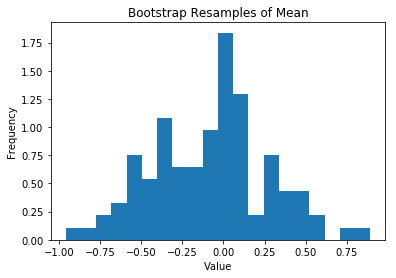

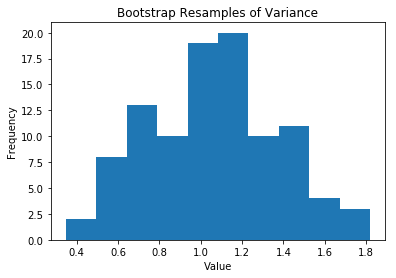

In [32]:
# 4. Visualize the summary statistic, calculate the variance or any other measure of spread to represent uncertainty in
#    the summary statistic.
plt.hist(mean,bins=20,normed=True)
plt.title("Bootstrap Resamples of Mean")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.hist(var)
plt.title("Bootstrap Resamples of Variance")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [33]:
# 5. Summary statistics to describe uncertainty in the mean from bootstrap
columns = ['mean']
df_mean = pd.DataFrame(mean,columns=columns)
df_mean.describe()


,mean
count,100.000000
mean,-0.080045
std,0.359072
min,-0.958700
25%,-0.354547
50%,-0.031626
75%,0.131660
max,0.891775


In [34]:
# 6. Summary statistics to describe uncertainty in the variance from bootstrap
columns = ['var']
df_var = pd.DataFrame(var,columns=columns)
df_var.describe()


,var
count,100.000000
mean,1.068578
std,0.313462
min,0.346469
25%,0.814319
50%,1.075160
75%,1.259427
max,1.819811


In [ ]:
# What did we learn?
# 1. Uncertainty decreases rapidly as the number of samples increases.
# 2. Bootstrap result for uncertainty in the mean is the same as standard error.
# 3. Bootstrap provides uncertainty in any statistic.
# 4. Bootstrap does not account for spatial context, location of data, local nonstationarity, spatial correlation etc.